In [27]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
heart_df= pd.read_csv("heart1.csv")

In [56]:
heart_df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


In [57]:
heart_df.shape

(303, 13)

In [46]:
heart_df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [47]:
heart_df[heart_df.chol>406].target.value_counts()

1    2
0    2
Name: target, dtype: int64

In [48]:
heart_df.corr()["target"]

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
target      1.000000
Name: target, dtype: float64

<AxesSubplot: ylabel='Frequency'>

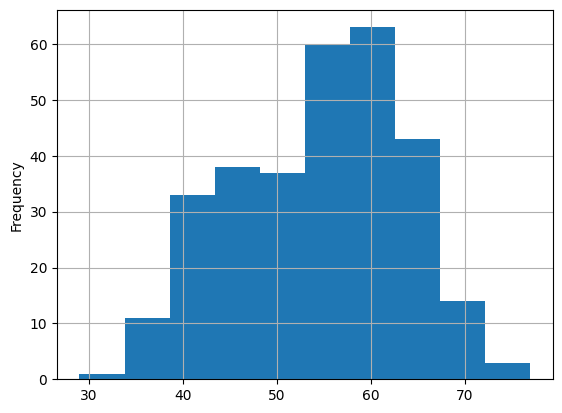

In [8]:
heart_df.age.plot(kind="hist",bins= 10,grid=True)

C:\Users\chemi\AppData\Local\Temp\ipykernel_18968\1824304250.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_df[heart_df.sex==0]["age"],label='male')
C:\Users\chemi\AppData\Local\Temp\ipykernel_18968\1824304250.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_df[heart_df.sex==

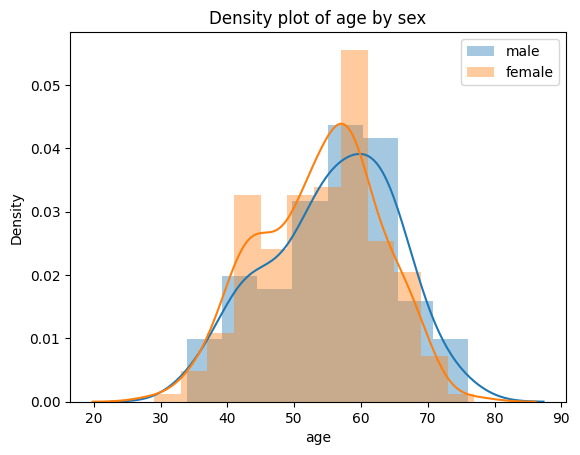

In [9]:
plt.figure()
sns.distplot(heart_df[heart_df.sex==0]["age"],label='male')
plt.legend()
sns.distplot(heart_df[heart_df.sex==1]["age"],label='female')
plt.legend()
plt.title("Density plot of age by sex")
plt.show()

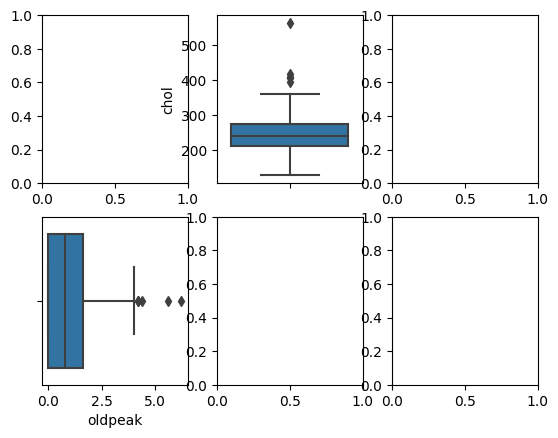

In [10]:
fig,axes=plt.subplots(nrows=2,ncols=3)
sns.boxplot(y='chol',data=heart_df,ax=axes[0,1])
sns.boxplot(x='oldpeak',data=heart_df,ax=axes[1,0])
plt.show()

<AxesSubplot: xlabel='target', ylabel='count'>

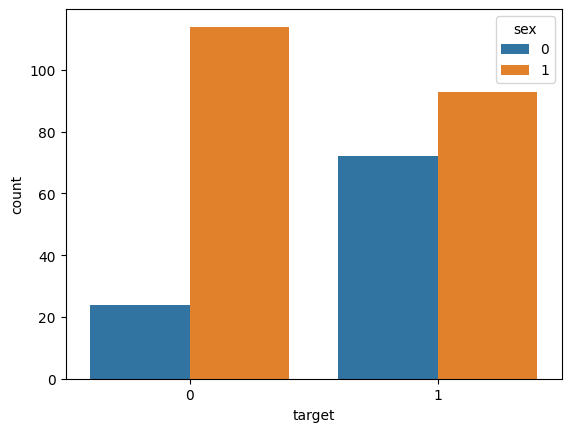

In [11]:
sns.countplot(x='target',data=heart_df,hue='sex')

<AxesSubplot: xlabel='age', ylabel='chol'>

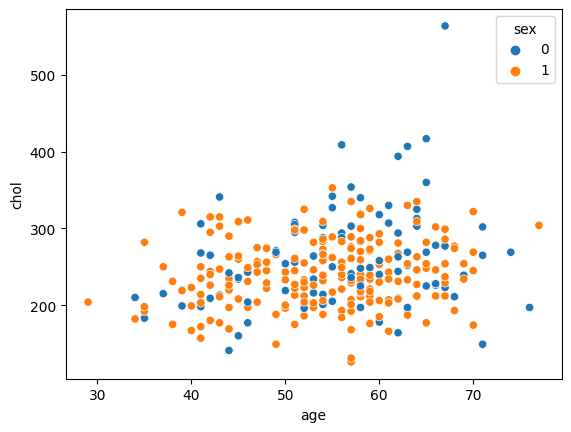

In [12]:
sns.scatterplot(x="age",y="chol",hue='sex',data=heart_df) 

# Building model

In [58]:
x=heart_df.drop('target',axis=1)
y=heart_df.target
print(x.shape)
print(y.shape)

(303, 12)
(303,)


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
print(x_train.shape)
print(x_test.shape)

(242, 12)
(61, 12)


In [15]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [16]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)


array([[19,  8],
       [ 7, 27]], dtype=int64)

In [52]:
accuracy_score(y_test,y_pred)

0.7540983606557377

 test confusion matrix


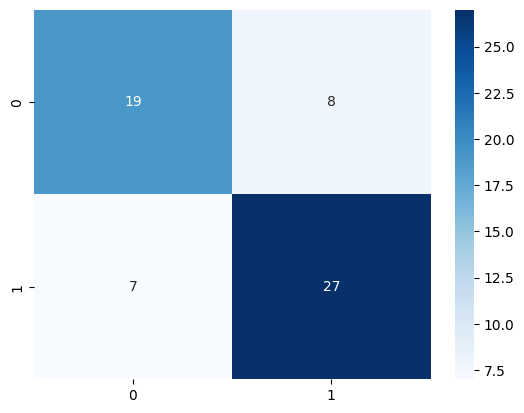

In [53]:
def plot_confusionmatrix(y_train,y_pred,dom):
    print(f' {dom} confusion matrix')
    cf=confusion_matrix(y_test,y_pred)
    sns.heatmap(cf,annot=True,cmap="Blues",fmt='g')
    plt.show()
plot_confusionmatrix(y_train,y_pred,dom='test')    

In [59]:
df=pd.DataFrame(columns=['depth','accuracy'])
df.depth=range(1,16)
#print(df.depth)
for i in df.depth:
    model=DecisionTreeClassifier(max_depth=i,splitter='best')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)*100
    df.accuracy[i-1]=acc_score
df

C:\Users\chemi\AppData\Local\Temp\ipykernel_18968\1877625935.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.accuracy[i-1]=acc_score
C:\Users\chemi\AppData\Local\Temp\ipykernel_18968\1877625935.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.accuracy[i-1]=acc_score
C:\Users\chemi\AppData\Local\Temp\ipykernel_18968\1877625935.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.accuracy[i-1]=acc_score
C:\Users\chemi\AppD

,depth,accuracy
0,1,78.688525
1,2,73.770492
2,3,78.688525
3,4,78.688525
4,5,77.04918
5,6,75.409836
6,7,72.131148
7,8,70.491803
8,9,70.491803
9,10,75.409836


<AxesSubplot: >

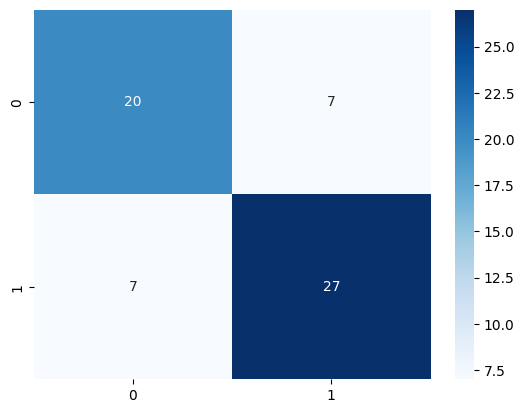

In [68]:
# so here we go with the max depth which is highest 
modle=DecisionTreeClassifier(max_depth=3,splitter='best')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
#print(accuracy_score(y_test,y_pred))
cf=confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,cmap='Blues')



In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        27
           1       0.79      0.79      0.79        34

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



# Random Forest|

In [56]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [57]:
telecom_data=pd.read_csv("customer_churn-2.csv")

In [58]:
telecom_data.head(5)
#churn is the target variable which will test wether take the services of telecom company or chaun out.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [59]:
telecom_data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [60]:
telecom_data['TotalCharges']=pd.to_numeric(telecom_data['TotalCharges'],errors='coerce')

In [61]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [62]:
telecom_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [63]:
telecom_data.dropna(inplace=True)

In [64]:
telecom_data.drop(columns=['customerID'],inplace=True)

In [65]:
telecom_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [66]:
from scipy.stats import chisquare
import scipy.stats
from scipy.stats import chi2
from scipy import stats
from scipy.stats import chi2_contingency

In [68]:
dataset_table=pd.crosstab(telecom_data['gender'],telecom_data['Churn'])
observed_values=dataset_table.values
var=chi2_contingency(dataset_table)
Expected_Values=var[3]
pd.DataFrame(var[3])
chi_square=sum([(o-e)**2/e for o,e in zip(observed_values,Expected_Values)])
chi_square

array([0.13645742, 0.37695542])

In [70]:
col_list=list(telecom_data.columns)
col_list.remove('Churn')
df=pd.DataFrame(columns=['feature','p-value'])
for col in col_list:
    if telecom_data[[col]][col].dtype=='object':
        #chisq Test for independence
        dataset_table=pd.crosstab(telecom_data[col],telecom_data['Churn'])
        #to convert into numpy array
        observed_values=dataset_table.values
        val=chi2_contingency(dataset_table)
        Expected_Values=val[3]
        chi_square=sum([(o-e)**2/e for o,e in zip(observed_values,Expected_Values)])
        chi_square_statistic=chi_square[0],chi_square[1]
        
        no_of_rows= len(dataset_table.iloc[0:2,0])
        no_of_columns=len(dataset_table.iloc[0,0:2])
        #print("ddof is a degree of freedom")
        ddof=(no_of_rows-1)*(no_of_columns-1)
        alpha=0.05
        critical_value=scipy.stats.chi2.ppf(q=1-alpha,df=ddof)
        p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
        df=df.append({'feature':col,'p-value':p_value},ignore_index=True)
        
df

C:\Users\chemi\AppData\Local\Temp\ipykernel_6396\648033537.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'feature':col,'p-value':p_value},ignore_index=True)
C:\Users\chemi\AppData\Local\Temp\ipykernel_6396\648033537.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'feature':col,'p-value':p_value},ignore_index=True)
C:\Users\chemi\AppData\Local\Temp\ipykernel_6396\648033537.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'feature':col,'p-value':p_value},ignore_index=True)
C:\Users\chemi\AppData\Local\Temp\ipykernel_6396\648033537.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,feature,p-value
0,gender,"[0.7118285245412936, 0.5392371646294403]"
1,Partner,"[8.931722028648892e-11, 0.0]"
2,Dependents,"[1.7591483825185605e-12, 0.0]"
3,PhoneService,"[0.6132485885962131, 0.400866901168656]"
4,MultipleLines,"[0.08348034769423207, 0.00401784049546805]"
5,InternetService,"[0.0, 0.0]"
6,OnlineSecurity,"[0.0, 0.0]"
7,OnlineBackup,"[0.0, 0.0]"
8,DeviceProtection,"[0.0, 0.0]"
9,TechSupport,"[0.0, 0.0]"


In [71]:
telecom_data.drop(columns=['gender'],inplace=True)
telecom_data.drop(columns=['PhoneService'],inplace=True)

In [72]:
telecom_data.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

# Label Encoder

In [73]:
telecom_data['Partner']=telecom_data['Partner'].map({'Yes':1,'No':0})
telecom_data['Dependents']=telecom_data['Dependents'].map({'Yes':1,'No':0})
telecom_data['MultipleLines']=telecom_data['MultipleLines'].map({'No phone service':0,'No':1,'Yes':2})
telecom_data['InternetService']=telecom_data['InternetService'].map({'DSL':1,'Fiber optic':0,'No':2})
telecom_data['OnlineSecurity']=telecom_data['OnlineSecurity'].map({'Yes':1,'No':0,'No internet service':2})
telecom_data['OnlineBackup']=telecom_data['OnlineBackup'].map({'Yes':1,'No':0,'No internet service':2})
telecom_data['DeviceProtection']=telecom_data['DeviceProtection'].map({'Yes':1,'No':0,'No internet service':2})
telecom_data['TechSupport']=telecom_data['TechSupport'].map({'Yes':1,'No':0,'No internet service':2})
telecom_data['StreamingTV']=telecom_data['StreamingTV'].map({'Yes':1,'No':0,'No internet service':2})
telecom_data['StreamingMovies']=telecom_data['StreamingMovies'].map({'Yes':1,'No':0,'No internet service':2})
telecom_data['Contract']=telecom_data['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2})
telecom_data['PaperlessBilling']=telecom_data['PaperlessBilling'].map({'Yes':1,'No':0})
telecom_data['PaymentMethod']=telecom_data['PaymentMethod'].map({'Electronic check':1,
                                'Mailed check':0,'Bank transfer (automatic)':2,'Credit card (automatic)':3})


In [74]:
telecom_data.isna().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

C:\Users\chemi\Desktop\enviroments\myml\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\chemi\Desktop\enviroments\myml\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\chemi\Desktop\enviroments\myml\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\chemi\Desktop\enviroments\myml\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args,

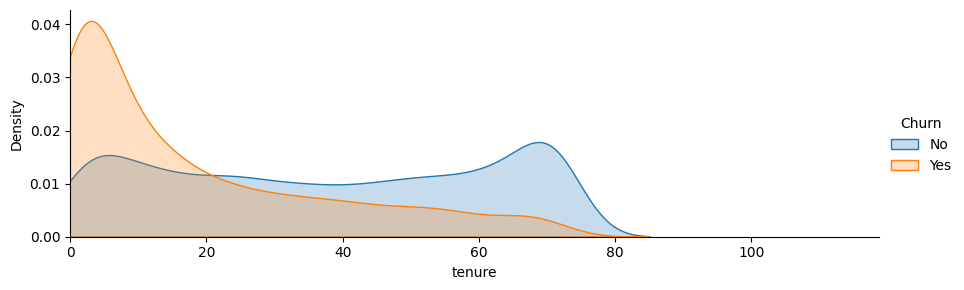

In [75]:
import seaborn as sns
facet=sns.FacetGrid(telecom_data,hue='Churn',aspect=3)
facet.map(sns.kdeplot,'tenure',shade=True)
facet.set(xlim=(0,telecom_data["MonthlyCharges"].max()))
facet.add_legend()
plt.show()

# MODEL BUILDING

In [76]:
telecom_data['Churn']=telecom_data['Churn'].map({'Yes':1,'No':0})

In [77]:
x=telecom_data.iloc[:,:-1].values
y=telecom_data.iloc[:,-1].values

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [79]:
# first go with non-tune data
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state= 42)

In [80]:
rf1=rf.fit(x_train,y_train)

In [81]:
y_pred=rf.predict(x_test)

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7825159914712153

 # Hyper parametre tuning


In [83]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators= [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=10,stop=110,num=11)]
# when there is no max_depth it takes none so that the model go to its maximum extent 
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]
# Create the random grid
random_grid={'n_estimators': n_estimators , 'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,
            'bootstrap':bootstrap}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [84]:
rf=RandomForestClassifier(random_state=42)
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,
                             scoring='neg_mean_absolute_error',cv=3,verbose=2,
                             random_state=42,n_jobs=-1,return_train_score=True)

rf2=rf_random.fit(x_train,y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\chemi\Desktop\enviroments\myml\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [85]:
rf2.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [88]:
y_pred=rf2.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [90]:
accuracy_score(y_pred,y_test)

0.7974413646055437

In [94]:
rf2.cv_results_

{'mean_fit_time': array([ 2.91058302, 13.1052901 ,  9.78713536, 16.20244726, 10.88059775,
         6.56723245,  9.15793236,  6.09320998, 10.62277087, 13.48415724,
         2.97074223,  8.012995  , 15.78509744, 12.38680418,  6.79084961,
        15.54952606,  5.53488898,  8.40387813, 17.10841719,  5.13586919,
        15.89769324, 16.86479855,  9.61371501, 14.06963372, 14.52745454,
         4.09280483, 14.55171458,  6.98123916, 16.44353247,  8.40428233,
         9.68925317,  7.27671361,  7.62707996,  5.1420997 , 12.41413832,
         7.31968919,  8.45305109,  6.41653411,  5.91985313,  7.58323558,
         1.34618155,  4.36452365,  5.75628233,  2.96832808,  1.98710783,
         7.60672442, 14.43589854,  3.49414317,  9.77902778,  5.53056407,
        19.06570355, 18.34078495,  8.31774219,  9.19592063, 13.99415008,
         4.95869056, 10.80937457, 13.54773347, 11.29121288,  9.45969137,
         1.61894615,  2.67222047,  8.35368371, 10.94122974, 11.01217167,
        11.45596933, 13.87856134, 

In [110]:
importance=rf1.feature_importances_
df=pd.DataFrame(columns=['Features','Importance'])
df["Features"]=col_list
df["Importance"]=importance
df.sort_values(by='Importance',ascending = False)

,Features,Importance
16,TotalCharges,0.199298
15,MonthlyCharges,0.180480
3,tenure,0.162591
12,Contract,0.088666
14,PaymentMethod,0.051021
9,TechSupport,0.042186
6,OnlineSecurity,0.037368
5,InternetService,0.031699
7,OnlineBackup,0.027321
4,MultipleLines,0.026256


['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']